<a href="https://colab.research.google.com/github/jli184/UM_WolverinePathways_2023/blob/main/pathways2023_AGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AGN variability

In this notebook, we will explore the variability signatures in AGN light curves, including

1.   plot the original light curves
2.   plot the Lomb-Scargle periodogram
3.   fit the light curves with the damped random walk

In [ ]:
!pip install alerce

In [ ]:
pip install celerite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
pip install emcee


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 530.7 kB/s eta 0:00:00


In [ ]:
pip install corner

In [ ]:
from alerce.core import Alerce
alerce = Alerce()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import celerite
from celerite import terms
from scipy.optimize import minimize
import emcee
import corner
from astropy.timeseries import LombScargle

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
detections = pd.read_csv('/content/drive/My Drive/Pathways_2023/alerce_lightcurves/ZTF19aasazmy_20230803/detections.csv') ## opening a file on the google drive
detections

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,ztf,58606.418414,852418415015015008,1,852418415015,20.886700,1,852,0.244444,20.424700,...,20.0532,0.2272,NaN,False,True,False,NaN,bulk_1.0.0,0,881217415015015000
1,ztf,58612.277593,858277595015015039,1,858277595015,20.817100,1,858,0.429188,20.379100,...,20.0266,0.2499,NaN,False,True,False,NaN,bulk_1.0.0,0,887193665015015000
2,ztf,58616.279213,862279215015015005,1,862279215015,20.250800,1,862,0.530488,20.260500,...,20.1398,0.4856,NaN,False,True,False,NaN,bulk_1.0.0,0,887193665015015000
3,ztf,58632.264224,878264225015015012,2,878264225015,20.438300,1,878,0.411720,20.314400,...,20.2661,0.4163,NaN,False,True,False,NaN,bulk_1.0.0,0,887193665015015000
4,ztf,58632.346343,878346345015015006,1,878346345015,20.679100,1,878,0.012871,20.503500,...,20.3468,0.3526,NaN,False,True,False,NaN,bulk_1.0.0,0,887193665015015000
5,ztf,58635.217419,881217415015015013,1,881217415015,20.981945,1,881,0.472403,20.231370,...,20.3615,0.2986,677120150.0,False,True,False,NaN,bulk_1.0.0,0,909215975015015000
6,ztf,58638.320903,884320905015015005,1,884320905015,20.862871,1,884,0.284225,20.196266,...,20.0034,0.2205,677120150.0,False,True,False,NaN,bulk_1.0.0,0,912206975015015000
7,ztf,58641.193669,887193665015015007,1,887193665015,20.789050,1,887,0.157042,20.167059,...,20.1148,0.2862,677120150.0,False,True,False,NaN,bulk_1.0.0,0,890257525015015000
8,ztf,58644.191667,890191665015015003,1,890191665015,20.276300,1,890,0.333741,20.001200,...,19.7695,0.2979,NaN,False,True,False,NaN,bulk_1.0.0,0,890257525015015000
9,ztf,58644.257523,890257525015015002,2,890257525015,20.283913,1,890,0.672306,20.031160,...,19.7031,0.3033,677120250.0,False,True,False,NaN,bulk_1.0.0,0,906191655015015000


## Step 1. Query Alerce database for AGN light curves

In [ ]:
# Define a dictionary called 'params' with various key-value pairs.
# These parameters will be used as inputs to the 'query_objects' function.
params = {
    "classifier": "lc_classifier",    # Specifies the classifier to be used.
    "format": "pandas",               # Specifies the output format for the query results.
    "class_name": 'AGN',              # Specifies the class of objects to query for (AGN in this case).
    "probability": 0.9,               # Sets the probability threshold for object classification.
    "ndet": [200, 500],               # Specifies a range of values for the 'ndet' attribute.
    "order_by": 'ndet',               # Sets the sorting criteria for the query results (based on 'ndet').
    "order_mode": "DESC"              # Sets the sorting order to be descending.
}

# Call the 'query_objects' function with the parameters provided in the 'params' dictionary.
# The returned result will be assigned to the variable 'objects'.
objects = alerce.query_objects(**params)

# Print the 'objects' variable to see the query results.
objects

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF18aaqkfet,1427,4464,58243.250000,60133.250000,True,False,493,-0.290100,0.428720,...,60133.277708,1668.769329,197.359525,53.691827,0.000094,0.000055,AGN,lc_classifier,0.948100,1.2.0
1,ZTF18aawkxlt,2045,3864,58237.250000,60122.250000,True,False,464,0.296600,0.529520,...,60122.348542,1823.162107,253.902395,44.847502,0.000051,0.000038,AGN,lc_classifier,0.907920,1.2.0
2,ZTF18aarohsl,1272,2728,58243.250000,59968.500000,True,False,453,-0.346535,0.301142,...,59968.404363,1720.207731,173.836574,63.345145,0.000122,0.000062,AGN,lc_classifier,0.900384,1.1.6
3,ZTF18aajafyb,1540,3341,58217.500000,60164.250000,True,False,452,0.077910,0.246779,...,60164.276586,1891.888993,263.111221,50.846865,0.000080,0.000046,AGN,lc_classifier,0.915848,1.2.0
4,ZTF18aavrcje,904,2776,58242.500000,60164.250000,True,False,452,0.103874,0.640349,...,60164.285185,1873.878113,269.598328,39.071606,0.000055,0.000042,AGN,lc_classifier,0.942672,1.2.0
5,ZTF19aaapjsg,1194,2498,58327.250000,60143.250000,True,False,446,-0.007483,0.479267,...,60143.227697,1670.691007,224.813726,35.873208,0.000057,0.000055,AGN,lc_classifier,0.948000,1.2.0
6,ZTF18abmnxcf,791,1882,58333.476053,59524.306724,True,False,441,-0.051277,0.547455,...,59524.306724,1190.830671,10.190754,39.613558,0.000054,0.000034,AGN,lc_classifier,0.903312,correction_1.0.6
7,ZTF18aajsypz,1350,6859,58222.500000,60149.250000,True,False,434,0.445133,0.540029,...,60149.331562,1887.902257,265.601175,43.490076,0.000096,0.000066,AGN,lc_classifier,0.915624,1.2.0
8,ZTF19abiugap,1093,1963,58608.250000,60163.250000,True,False,433,-0.028406,0.518508,...,60163.258935,1497.047523,244.460305,20.452404,0.000053,0.000056,AGN,lc_classifier,0.902000,1.2.0
9,ZTF18aaxrxcp,1340,3670,58254.500000,60163.250000,True,False,430,-0.101500,0.633120,...,60163.241748,1595.725544,247.162862,45.351716,0.000055,0.000037,AGN,lc_classifier,0.928140,1.2.0


In [ ]:
# Define a function called 'plot_corrLC' that takes the 'oid' (object ID) as input.
def plot_corrLC(oid):

    # Query detections for the given object ID and store the results in the 'detections' variable.
    detections = alerce.query_detections(oid, format="pandas")

    # Drop rows with missing values in the 'magpsf_corr' and 'sigmapsf_corr' columns from the 'detections' DataFrame.
    detections.dropna(inplace=True, subset=['magpsf_corr', 'sigmapsf_corr'])

    # Create a new matplotlib figure with a size of 10x5 inches.
    plt.subplots(figsize=(10, 5))

    # Define dictionaries with mapping information for passbands.
    labels = {1: 'g', 2: 'r'}       # Labels for passbands (1: green, 2: red).
    colors = {1: 'g', 2: 'r'}       # Colors for passbands (1: green, 2: red).
    markers = {1: 'o', 2: 's'}      # Marker types for passbands (1: circles, 2: squares).

    # Loop through the passbands (1 and 2 in this case).
    for fid in [1, 2]:

        # Create a boolean mask to filter detections for the current passband.
        mask = detections.fid == fid

        # Check if there are detections available for the current passband.
        if np.sum(mask) > 0:
            # Plot the detections for the current passband as error bars.
            # X-axis: MJD (Modified Julian Date), Y-axis: psf corrected magnitudes.
            # Error bars are defined by the 'sigmapsf_corr_ext' column.
            plt.errorbar(detections[mask].mjd, detections[mask].magpsf_corr,
                         yerr=detections[mask].sigmapsf_corr_ext, c=colors[fid],
                         fmt=markers[fid], label=labels[fid], alpha=0.8, markersize=3)

        # Store the data points for each passband in separate variables 'LC_g' and 'LC_r'.
        if fid == 1:
            LC_g = detections[mask].mjd, detections[mask].magpsf_corr, detections[mask].sigmapsf_corr_ext
        if fid == 2:
            LC_r = detections[mask].mjd, detections[mask].magpsf_corr, detections[mask].sigmapsf_corr_ext

    # Set the title of the plot to the object ID (oid).
    plt.title(oid)

    # Invert the y-axis to represent brighter magnitudes at the top.
    plt.gca().invert_yaxis()

    # Set the font size for x-axis and y-axis ticks.
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Set the x-axis and y-axis labels and their font sizes.
    plt.xlabel('MJD', fontsize=14)
    plt.ylabel('Apparent Magnitude', fontsize=14)

    # Add a legend to the plot with the specified font size.
    plt.legend(fontsize=12)

    # Return the data points for each passband as NumPy arrays.
    return np.array(LC_g), np.array(LC_r);

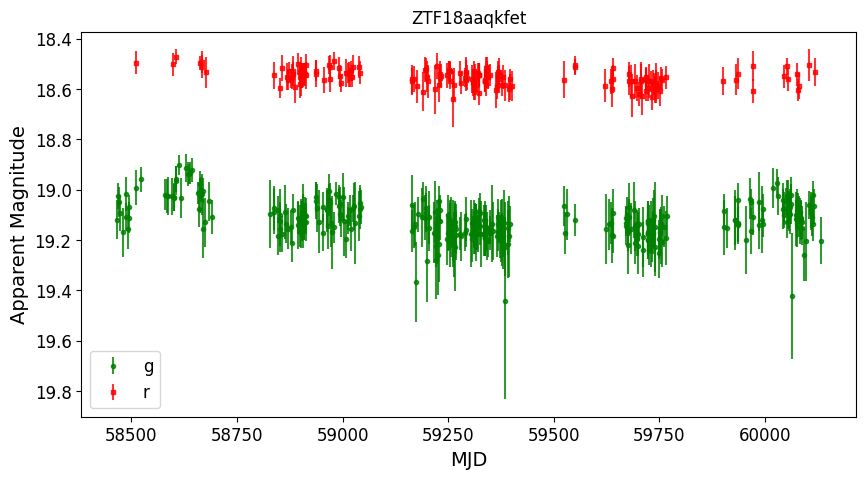

In [ ]:
# Call the function 'plot_corrLC' with the 'oid' (object ID) of the first entry in the 'objects' DataFrame.
# The function returns two arrays, 'LC_g' and 'LC_r', which will be assigned to the variables 'LC_g' and 'LC_r' respectively.
LC_g, LC_r = plot_corrLC(objects['oid'][0])

## Step 2. Explore Lomb-Scargle Periodograms

Text(0, 0.5, 'Power [mag^2 day]')

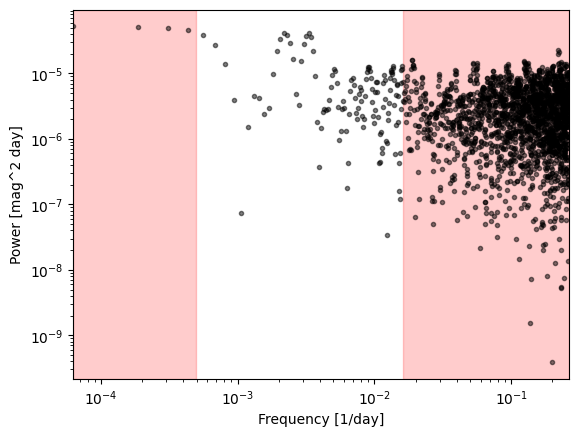

In [ ]:
# Unpack the data arrays 'LC_r' into separate variables for time, magnitude, and magnitude error.
time, mag, magerr = LC_r

# Compute the Lomb-Scargle periodogram for the time series data.
# The 'autopower' function automatically computes the power spectrum, and 'normalization='psd'' sets the normalization to power spectral density.
frequency, power = LombScargle(time, mag, magerr).autopower(normalization='psd')

# Calculate the sampling frequency (fs) of the time series data.
# fs is the inverse of the minimum time interval (cadence) between data points.
fs = (1./(np.min(np.diff(time)[np.diff(time)>0])))

# Normalize the power spectrum.
power = power * 2 / (len(time) * fs)

# Plot the Lomb-Scargle periodogram (frequency vs. power).
# The data points are shown as black dots with 50% opacity (alpha=0.5).
plt.plot(frequency, power, '.', color='k', alpha=0.5)

# Set the x-axis to a logarithmic scale for better visualization.
plt.xscale('log')

# Set the y-axis to a logarithmic scale for better visualization.
plt.yscale('log')

# Label the uncertain zones on the plot: larger than average cadence or 20% of the baseline
# The first zone spans from the minimum frequency to 1 / (2 * π * 0.2 * baseline), marked with a red color and alpha=0.2.
# The second zone spans from 1 / (2 * π * mean(cadence)) to the maximum frequency, marked with a red color and alpha=0.2.
plt.axvspan(np.min(frequency), 1/(2*np.pi*0.2*(time[-1]-time[0])), color='red', zorder=-1, alpha=0.2)
fmax = 1./(2*np.pi*np.mean(np.diff(time)[np.diff(time)>0]))
plt.axvspan(fmax, np.max(frequency), color='red', zorder=-1, alpha=0.2)

# Set the x-axis limits to span the entire range of frequencies.
plt.xlim([np.min(frequency), np.max(frequency)])

# Set the x-axis label.
plt.xlabel('Frequency [1/day]')

# Set the y-axis label.
plt.ylabel('Power [mag^2 day]')


### Coding Challenge: Can you write a function to take object IDs as input, and plot their Lomb-Scargle periodagram (either or both bands)?



## Step 3. Fitting the light curves

In [ ]:
# Define a function called 'fit_drw_mle' that fits a damped random walk (DRW) model using Maximum Likelihood Estimation (MLE).

def fit_drw_mle(time, mag, magerr, init='minimize', seed=42, plot=True):

    # The function takes the following inputs:
    # - time: Array of time values.
    # - mag: Array of magnitude values.
    # - magerr: Array of magnitude errors.
    # - init: Initial parameter estimation method (default is 'minimize').
    # - seed: Seed for random number generation (default is 42).
    # - plot: Flag to control whether to plot the results (default is True).

    # Seed the random number generator to ensure reproducibility.
    np.random.seed(seed)

    # Sort the data based on time.
    ind = np.argsort(time)
    time = time[ind]
    mag = mag[ind]
    magerr = magerr[ind]

    # Define the initial guess and bounds for DRW parameters.
    min_precision = np.min(magerr)
    amplitude = np.max(mag + magerr) - np.min(mag - magerr)
    amin = np.log(0.001 * min_precision)
    amax = np.log(10 * amplitude)
    log_a = np.mean([amin, amax])

    min_cadence = np.clip(np.min(np.diff(time)), 1e-8, None)
    cmin = np.log(1 / (10 * (time[-1] - time[0])))
    cmax = np.log(1 / min_cadence)
    log_c = np.mean([cmin, cmax])

    smin = -10
    smax = np.log(amplitude)
    log_s = np.mean([smin, smax])

    # Initialize the Gaussian Process kernel with appropriate terms and bounds.
    kernel = terms.RealTerm(log_a=log_a, log_c=log_c, bounds=dict(log_a=(amin, amax), log_c=(cmin, cmax)))
    kernel += terms.JitterTerm(log_sigma=log_s, bounds=dict(log_sigma=(smin, smax)))

    # Create a Gaussian Process (GP) with the specified kernel and mean value.
    gp = celerite.GP(kernel, mean=np.mean(mag), fit_mean=False)

    # Compute the GP for the given time and magnitude errors.
    gp.compute(time, magerr)

    # Print the initial log-likelihood of the GP model.
    print("Initial log-likelihood: {0}".format(gp.log_likelihood(mag)))

    # Define a cost function for the negative log-likelihood.
    def neg_log_like(params, y, gp):
        gp.set_parameter_vector(params)
        return -gp.log_likelihood(y)

    # Define a gradient function for the negative log-likelihood.
    def grad_neg_log_like(params, y, gp):
        gp.set_parameter_vector(params)
        return -gp.grad_log_likelihood(y)[1]

    # Fit for the maximum likelihood parameters using L-BFGS-B optimization.
    initial_params = gp.get_parameter_vector()
    bounds = gp.get_parameter_bounds()
    soln = minimize(neg_log_like, initial_params, jac=grad_neg_log_like,
                    method="L-BFGS-B", bounds=bounds, args=(mag, gp))
    gp.set_parameter_vector(soln.x)

    # Print the final log-likelihood of the GP model after fitting.
    print("Final log-likelihood: {0}".format(-soln.fun))

    # Make the maximum likelihood prediction using the GP model.
    t = np.linspace(np.min(time), np.max(time), 500)
    mu, var = gp.predict(mag, t, return_var=True)
    std = np.sqrt(var)

    # Plot the data and the maximum likelihood prediction if 'plot' flag is set to True.
    if plot:
        color = "#ff7f0e"
        plt.figure(figsize=(10,5))
        plt.errorbar(time, mag, yerr=magerr, fmt=".k", capsize=0)
        plt.plot(t, mu, color=color)
        plt.fill_between(t, mu+std, mu-std, color=color, alpha=0.3, edgecolor="none")
        plt.ylabel(r"$mag$")
        plt.xlabel(r"$time$")
        plt.xlim(np.min(time), np.max(time))
        plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))
        plt.title("Maximum Likelihood Prediction")
        plt.show()

    # Return the optimized parameter vector.
    return soln.x;


In [ ]:
# Define a function called 'fit_drw_mcmc' that fits a damped random walk (DRW) model using Markov Chain Monte Carlo (MCMC).

def fit_drw_mcmc(time, mag, magerr, init='minimize', nburn=500, nsamp=1000, color="#ff7f0e", seed=42, plot=True):

    # The function takes the following inputs:
    # - time: Array of time values.
    # - mag: Array of magnitude values.
    # - magerr: Array of magnitude errors.
    # - init: Initial parameter estimation method (default is 'minimize').
    # - nburn: Number of burn-in samples for MCMC.
    # - nsamp: Number of posterior samples for MCMC.
    # - color: Color for plotting (default is "#ff7f0e").
    # - seed: Seed for random number generation (default is 42).
    # - plot: Flag to control whether to plot the results (default is True).

    # Seed the random number generator to ensure reproducibility.
    np.random.seed(seed)

    # Sort the data based on time.
    ind = np.argsort(time)
    time = time[ind]
    mag = mag[ind]
    magerr = magerr[ind]

    # Define the initial guess and bounds for DRW parameters.
    min_precision = np.min(magerr)
    amplitude = np.max(mag + magerr) - np.min(mag - magerr)
    amin = np.log(0.001 * min_precision)
    amax = np.log(10 * amplitude)
    log_a = np.mean([amin, amax])

    min_cadence = np.clip(np.min(np.diff(time)), 1e-8, None)
    cmin = np.log(1 / (10 * (time[-1] - time[0])))
    cmax = np.log(1 / min_cadence)
    log_c = np.mean([cmin, cmax])

    smin = -10
    smax = np.log(amplitude)
    log_s = np.mean([smin, smax])

    # Initialize the Gaussian Process kernel with appropriate terms and bounds.
    kernel = terms.RealTerm(log_a=log_a, log_c=log_c, bounds=dict(log_a=(amin, amax), log_c=(cmin, cmax)))
    kernel += terms.JitterTerm(log_sigma=log_s, bounds=dict(log_sigma=(smin, smax)))

    # Create a Gaussian Process (GP) with the specified kernel and mean value.
    gp = celerite.GP(kernel, mean=np.mean(mag), fit_mean=False)

    # Compute the GP for the given time and magnitude errors.
    gp.compute(time, magerr)

    # Use the MLE fit as the initial parameters for the MCMC.
    sol = fit_drw_mle(time, mag, magerr, plot=False)
    gp.set_parameter_vector(sol)

    # Define the log probability function for the MCMC.
    def log_probability(params):
        gp.set_parameter_vector(params)
        lp = gp.log_prior()
        if not np.isfinite(lp):
            return -np.inf
        return gp.log_likelihood(mag) + lp

    # Set up the MCMC sampler with ensemble walkers.
    initial = np.array(sol)
    ndim, nwalkers = len(initial), 32
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)

    # Run the burn-in phase of the MCMC.
    print("Running burn-in...")
    p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler.run_mcmc(p0, nburn)

    # Reset the sampler and run the production phase of the MCMC.
    print("Running production...")
    sampler.reset()
    sampler.run_mcmc(p0, nsamp);

    # Plot the data and the posterior predictions if 'plot' flag is set to True.
    if plot:

        # Plot the light curve data.
        fig_lc = plt.figure(figsize=(10,5))
        plt.errorbar(time, mag, yerr=magerr, fmt=".k", capsize=0)

        # Plot 100 posterior samples of the DRW model.
        samples = sampler.flatchain
        for s in samples[np.random.randint(len(samples), size=100)]:
            gp.set_parameter_vector(s)
            mu = gp.predict(mag, time, return_cov=False)
            plt.plot(time, mu, color=color, alpha=0.3)

        plt.ylabel(r"$mag$")
        plt.xlabel(r"$time$")
        plt.xlim(np.min(time), np.max(time))
        plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))
        plt.title("Posterior Predictions");

        # Create a corner plot for the posterior samples of the DRW parameters.
        fig_corner, axs = plt.subplots(3, 3, figsize=(5, 5))
        samples_sf = [np.log10(np.sqrt(np.exp(samples[:, 0] / 2))),
                      np.log10(1 / np.exp(samples[:, 1])),
                      np.log10(np.exp(samples[:, 2]))]
        samples_sf = np.array(samples_sf).T
        fig_corner = corner.corner(samples_sf, show_titles=True, fig=fig_corner, quantiles=[0.16, 0.5, 0.84],
                                   labels=[r"$\log_{10}\ \sigma_{\rm{DRW}}$", r"$\log_{10}\ \tau_{\rm{DRW}}$",
                                           r"$\log_{10}\ \sigma_{\rm{n}}$"],
                                   label_kwargs=dict(fontsize=14), title_kwargs=dict(fontsize=10))

        # Draw the region for bad tau values in red color.
        axs[1, 1].axvspan(np.log10(0.2 * (time[-1] - time[0])), np.log10(10 * (time[-1] - time[0])),
                          color="red", zorder=-5, alpha=0.2)
        axs[2, 1].axvspan(np.log10(0.2 * (time[-1] - time[0])), np.log10(10 * (time[-1] - time[0])),
                          color="red", zorder=-5, alpha=0.2)

        plt.show()

    # Return the GP model, posterior samples, and figures.
    return gp, samples_sf;


Initial log-likelihood: 272.78537406961937
Final log-likelihood: 441.4733683018535


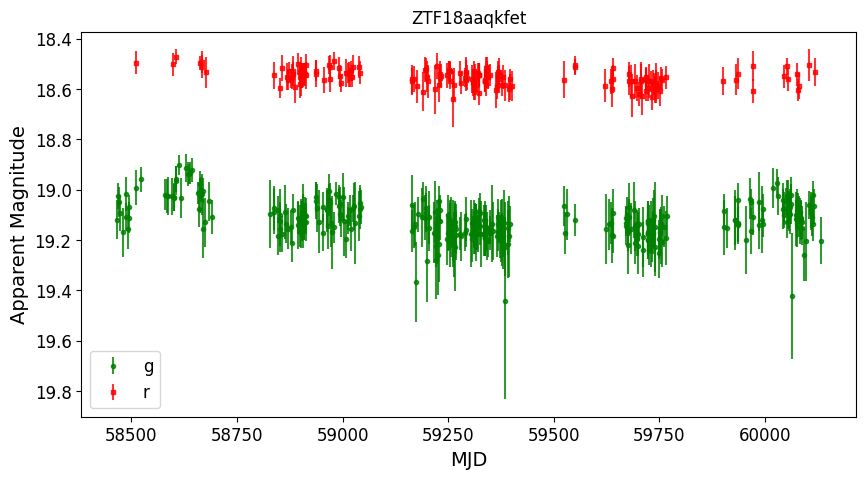

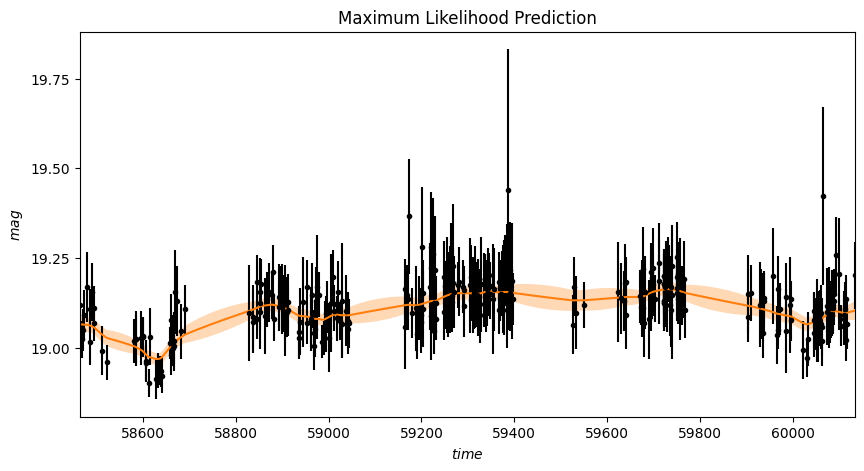

Initial guess for the DRW parameters [ -5.83953721  -5.57787098 -10.        ]


In [ ]:
# Call the function 'plot_corrLC' with the 'oid' (object ID) of the first entry in the 'objects' DataFrame for the 'g' passband.
# The function returns two arrays, 'LC_g' and 'LC_r', representing the time, magnitude, and magnitude error for the 'g', 'r' passband.
LC_g, LC_r = plot_corrLC(objects['oid'][0])

# Unpack the data arrays for 'time', 'mag', and 'magerr' for the 'g' passband.
time, mag, magerr = LC_g

# Call the function 'fit_drw_mle' to fit a damped random walk (DRW) model using Maximum Likelihood Estimation (MLE) for the 'g' passband.
# The function returns the optimized parameter vector 'sol' for the DRW model.
sol = fit_drw_mle(time, mag, magerr)

# Print the optimized parameter vector 'sol'.
print('Initial guess for the DRW parameters', sol)

In [ ]:
# Call the function 'fit_drw_mcmc' to fit a damped random walk (DRW) model using Markov Chain Monte Carlo (MCMC).

BHmass = np.zeros(10)
print(BHmass)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
np.median(samples[:,1])

2.642498596510425

## Step 4. Use Equation 2 from [Burke+2021](https://www.science.org/doi/epdf/10.1126/science.abg9933) to estimate the black hole mass

$M_{BH} = 10^{7.97} (\tau_{DRW}/100 days)^{2.54} M_{\odot}$

In [ ]:
# Define a function called 'BHmass_from_tau' that calculates the black hole mass (BH mass) using the given time lag (tau) value.
# The function takes the 'tau' value as input, representing the time lag in days.

def BHmass_from_tau(tau):
    # Calculate the BH mass using the formula: M_BH = log10(10^7.97 * (tau/100)^2.54)
    # where 'tau' is the time lag in days.
    # The formula is an empirical relation to estimate the black hole mass based on the time lag observed in AGN (active galactic nuclei) variability.
    # The formula parameters 7.97 and 2.54 are specific to the relation and are derived from observational data.

    return np.log10(10**7.97 * (tau/100)**2.54);


In [ ]:
print('BH mass of %s is %.2f M_Sun'% (objects['oid'][0],BHmass_from_tau(10**2.64)))

BH mass of ZTF18aaqkfet is 9.60 M_Sun


### Excercise: Fit DRW to all AGN from notes to estimate the BH masses